In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data Cleaning
Read data, drop some of the most irrelevant fields and clean data to get rid of unwanted characters

In [8]:
df = pd.read_csv(r'C:\Users\bhavy\Desktop\INFO_DS\Project3_Data\lending-club-loan-data\loan.csv')
pd.set_option('display.max_columns',None)
df.fillna(0,inplace=True)

In [10]:
# Drop unneccesary columns
df = df.drop(['url', 'desc', 'policy_code', 'last_pymnt_d', 'next_pymnt_d', 'earliest_cr_line', 'emp_title','sub_grade','application_type','verification_status_joint'], axis=1)
df = df.drop(['member_id', 'title', 'last_credit_pull_d', 'total_rec_late_fee', 'total_rec_prncp', 'zip_code','initial_list_status','pymnt_plan'], axis=1)

In [11]:
# A helper function that converts 
# ["a", "b", "a", "c"] into
# [1, 2, 1, 3]
# This allows the machine learning algorithims to work on integers instead of strings
def categorize(l):
    uniques = sorted(list(set(l)))
    return [uniques.index(x) + 1 for x in l]

In [12]:
#cleaning unwanted characters
df['emp_length'].replace(regex=True,inplace=True,to_replace=r'years',value=r'')
df['emp_length'].replace(regex=True,inplace=True,to_replace=r'year',value=r'')
df['emp_length'].replace(regex=True,inplace=True,to_replace=r'10+ ',value=r'10')
df['emp_length'].replace(regex=True,inplace=True,to_replace=r'< 1',value=r'10')
df['emp_length'] = df['emp_length'].replace('10+ ','10')

df['term'].replace(regex=True,inplace=True,to_replace=r'months',value=r'')


In [13]:
#convert categorical data to numeric using the categorize method defined above
df['grade'] = categorize(df['grade'])
df['home_ownership'] = categorize(df['home_ownership'])
df['purpose'] = categorize(df['purpose'])
df['verification_status'] = categorize(df['verification_status'])
df['addr_state'] = categorize(df['addr_state'])
df['loan_status'] = categorize(df['loan_status'])
df['issue_d'] = categorize(df['issue_d'])

df['term'] =df['term'].astype(float)
df['emp_length'] =df['emp_length'].astype(float)


df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,5000.0,5000.0,4975.0,36.0,10.65,162.87,2,10.0,6,24000.0,3,22,6,n,2,4,27.65,0.0,1.0,0.0,0.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,861.07,0.00,0.00,171.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1077430,2500.0,2500.0,2500.0,60.0,15.27,59.83,3,10.0,6,30000.0,2,22,1,n,1,11,1.00,0.0,5.0,0.0,0.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,435.17,117.08,1.11,119.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1077175,2400.0,2400.0,2400.0,36.0,15.96,84.33,3,10.0,6,12252.0,1,22,6,n,12,15,8.72,0.0,2.0,0.0,0.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,603.65,0.00,0.00,649.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1076863,10000.0,10000.0,10000.0,36.0,13.49,339.31,3,10.0,6,49200.0,2,22,6,n,10,5,20.00,0.0,1.0,35.0,0.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,2209.33,0.00,0.00,357.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1075358,3000.0,3000.0,3000.0,60.0,12.69,67.79,2,1.0,6,80000.0,2,22,2,n,10,38,17.94,0.0,0.0,38.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,1009.07,0.00,0.00,67.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Variable Selection
Randomly split the dataset into training and testing sets

In [14]:
target = df.int_rate

#set 50% of data as training set and 50% as testing set
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=
0.5)
X_test,X_dev,y_test,y_dev = train_test_split(X_test,y_test, test_size=0.5)

In [15]:
X_train.drop(["int_rate"], axis = 1, inplace = True)
X_test.drop(["int_rate"], axis = 1, inplace = True)
X_dev.drop(["int_rate"], axis = 1, inplace = True)

C:\Users\bhavy\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Text(0, 0.5, 'Count')

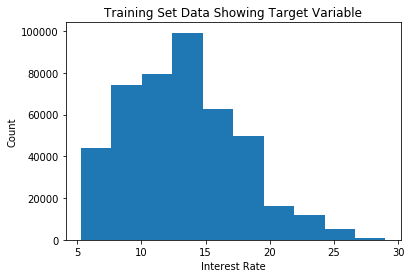

In [16]:
plt.hist(y_train)
plt.title('Training Set Data Showing Target Variable')
plt.xlabel('Interest Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

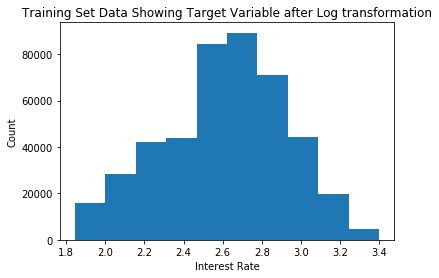

In [17]:
y_train_log=np.log1p(y_train)

Traindata=X_train
Traindata=Traindata.join([y_train])

plt.hist(y_train_log)
plt.title('Training Set Data Showing Target Variable after Log transformation')
plt.xlabel('Interest Rate')
plt.ylabel('Count')

Text(0.5, 0, 'Correlation with Interest Rate')

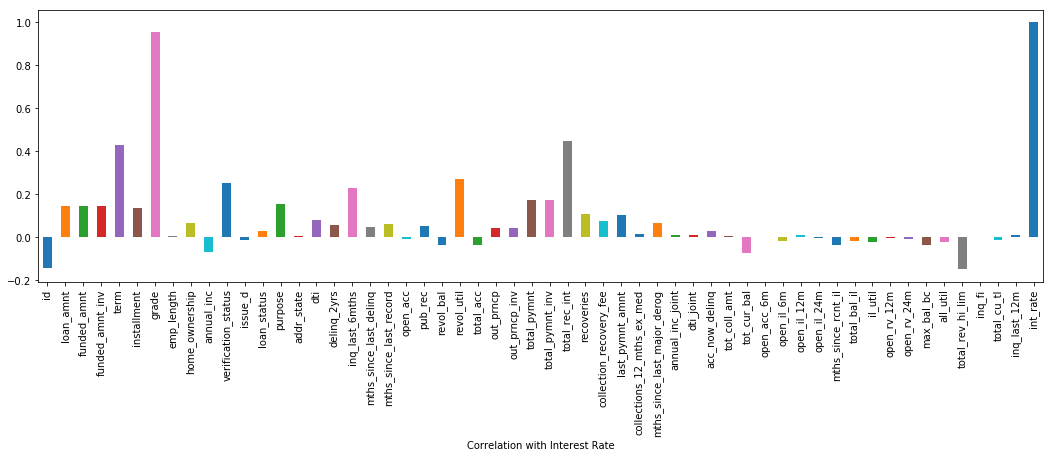

In [18]:
ax = Traindata.corr()['int_rate'].plot(kind = "bar", figsize=(18,5))
ax.set_xlabel('Correlation with Interest Rate')

In [19]:
#Features in descending order 
cor = Traindata.corr()['int_rate'].sort_values(ascending=False)
print(cor)

int_rate                       1.000000
grade                          0.954166
total_rec_int                  0.446664
term                           0.428699
revol_util                     0.268713
verification_status            0.253051
inq_last_6mths                 0.227664
total_pymnt_inv                0.172735
total_pymnt                    0.171807
purpose                        0.151558
funded_amnt_inv                0.145904
funded_amnt                    0.145881
loan_amnt                      0.145713
installment                    0.133580
recoveries                     0.106086
last_pymnt_amnt                0.101673
dti                            0.079648
collection_recovery_fee        0.074119
mths_since_last_major_derog    0.064476
home_ownership                 0.064383
mths_since_last_record         0.062098
delinq_2yrs                    0.056741
pub_rec                        0.052501
mths_since_last_delinq         0.046904
out_prncp                      0.041384


In [20]:
#saving the cleaned data
df.to_csv(r'Cleaned_loan.csv')

# Variable selection using FeatureTools

In [34]:
import featuretools as ft
import featuretools.primitives.api as ftypes
import featuretools.variable_types as vtypes

es = ft.EntitySet(id = 'clients')
es = es.entity_from_dataframe(entity_id = 'df', dataframe = df, index = 'id')

primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100
default_agg_primitives =  ["sum", "std", "max", "skew", "min", "mean", "count", "percent_true", "num_unique", "mode"]
default_trans_primitives =  ["numwords", "characters"]

# DFS with specified primitives
feature_names = ft.dfs(entityset = es, target_entity = 'df',
                       trans_primitives = [],
                       agg_primitives=default_agg_primitives, 
                       where_primitives = [], seed_features = [],
                       max_depth = 2, n_jobs = -1, verbose = 1,
                       features_only=True,max_features=20)

Built 20 features


In [38]:
import featuretools as ft

# saving identifiers
identifier = df

#Target variable
targ = df['int_rate']

es = ft.EntitySet(id = 'df')
es = es.entity_from_dataframe(entity_id = 'dat', dataframe = df, index = 'id')
es.normalize_entity(base_entity_id='dat', new_entity_id='targ', index = 'id')

print(es)

Entityset: df
  Entities:
    dat [Rows: 887379, Columns: 57]
    targ [Rows: 887379, Columns: 1]
  Relationships:
    dat.id -> targ.id


In [41]:
feature_matrix, feature_names = ft.dfs(entityset=es, 
target_entity = 'targ', 
max_depth = 2, 
verbose = 1, 
n_jobs = 3)

Built 332 features
EntitySet scattered to workers in 13.238 seconds
Elapsed: 00:00 | Remaining: ? | Progress:   0%|                                               | Calculated: 0/11 chunks

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:54457 remote=tcp://127.0.0.1:54355>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:54466 remote=tcp://127.0.0.1:54355>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:54479 remote=tcp://127.0.0.1:54355>


Elapsed: 2:07:49 | Remaining: 00:00 | Progress: 100%|████████████████████████████████████████| Calculated: 11/11 chunks


tornado.application - ERROR - Exception in Future <Future cancelled> after timeout
Traceback (most recent call last):
  File "C:\Users\bhavy\Anaconda3\lib\site-packages\tornado\gen.py", line 970, in error_callback
    future.result()
concurrent.futures._base.CancelledError
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:54738 remote=tcp://127.0.0.1:54707>


In [43]:
pd.set_option('display.max_columns', 500)
feature_matrix.columns

Index(['SUM(dat.loan_amnt)', 'SUM(dat.funded_amnt)',
       'SUM(dat.funded_amnt_inv)', 'SUM(dat.term)', 'SUM(dat.int_rate)',
       'SUM(dat.installment)', 'SUM(dat.grade)', 'SUM(dat.emp_length)',
       'SUM(dat.home_ownership)', 'SUM(dat.annual_inc)',
       ...
       'MEAN(dat.open_rv_12m)', 'MEAN(dat.open_rv_24m)',
       'MEAN(dat.max_bal_bc)', 'MEAN(dat.all_util)',
       'MEAN(dat.total_rev_hi_lim)', 'MEAN(dat.inq_fi)',
       'MEAN(dat.total_cu_tl)', 'MEAN(dat.inq_last_12m)',
       'NUM_UNIQUE(dat.pymnt_plan)', 'MODE(dat.pymnt_plan)'],
      dtype='object', length=332)